In [ ]:


# 1. Import data from HW5.xlsx into data frame, and print the data.
# Age: customer's age in completed years
# Experience: years of professional experience
# Education: 1=undergrad; 2=grad; 3=advanced/professional
# Family: family size
# Zip: home address zip code
# Income: annual income in $,000
# Mortgage: value of house mortgage if any in $,000
# Credit: average monthly spending on credit cards in $,000
# Loan: Does the customer have a personal loan?
# Securities: Does the customer have a securities account?
# Deposit: Does the customer have a certificate of deposit account?
# Online: Does the customer use internet banking?
# Card: Does the customer use a credit card?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.cluster.vq import kmeans, vq 
df = pd.read_excel("HW5.xlsx")
df

,Age,Experience,Education,Family,Zip,Income,Mortgage,Credit,Loan,Securities,Deposit,Online,Card
0,25,1,1,4,91107,49,0,1.6,0,1,0,0,0
1,45,19,1,3,90089,34,0,1.5,0,1,0,0,0
2,39,15,1,1,94720,11,0,1.0,0,0,0,0,0
3,35,9,2,1,94112,100,0,2.7,0,0,0,0,0
4,35,8,2,4,91330,45,0,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3,1,92697,40,0,1.9,0,0,0,1,0
4996,30,4,1,4,92037,15,85,0.4,0,0,0,1,0
4997,63,39,3,2,93023,24,0,0.3,0,0,0,0,0
4998,65,40,2,3,90034,49,0,0.5,0,0,0,1,0


                 Age  Experience  Education  ...   Deposit    Online      Card
Age         1.000000    0.994215   0.041334  ...  0.008043  0.013702  0.007681
Experience  0.994215    1.000000   0.013152  ...  0.010353  0.013898  0.008967
Education   0.041334    0.013152   1.000000  ...  0.013934 -0.015004 -0.011014
Family     -0.046418   -0.052563   0.064929  ...  0.014110  0.010354  0.011588
Zip        -0.029216   -0.028626  -0.017377  ...  0.019972  0.016990  0.007691
Income     -0.055269   -0.046574  -0.187524  ...  0.169738  0.014206 -0.002385
Mortgage   -0.012539   -0.010582  -0.033327  ...  0.089311 -0.005995 -0.007231
Credit     -0.052012   -0.050077  -0.136124  ...  0.136534 -0.003611 -0.006689
Loan       -0.007726   -0.007413   0.136722  ...  0.316355  0.006278  0.002802
Securities -0.000436   -0.001232  -0.010812  ...  0.317034  0.012627 -0.015028
Deposit     0.008043    0.010353   0.013934  ...  1.000000  0.175880  0.278644
Online      0.013702    0.013898  -0.015004  ...  0.

Text(0.5, 1.0, 'Correlation Colormap')

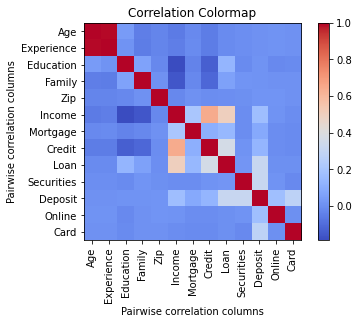

In [ ]:
# 2. Apply pandas.DataFrame.corr to analyze pairwise correlations of columns.
# 2.1 Print the pairwise correlations.
# 2.2 Show pairwise correlations in colormap with colorbar.
# 2.3 Label axes and figure title.
cor = df.corr()
print(cor)
plt.imshow(df.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.xlabel("Pairwise correlation columns")
plt.ylabel("Pairwise correlation columns")
plt.title("Correlation Colormap")

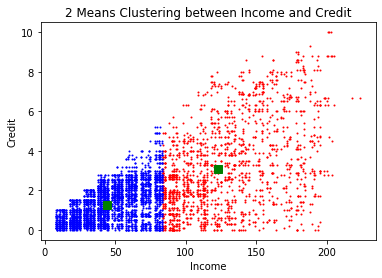

In [ ]:
# 3. Apply scipy.cluster.vq to perform 2-means clustering between Income and Credit.
# 3.1 Show two clusters in red or blue dots of size 1.
# 3.2 Show two centroids in green squares of size 8.
# 3.3 Label axes and figure title.

data = pd.concat((df['Income'],df['Credit']),axis=1)
centroids,_ = kmeans(data,2) 
# assign each sample to a cluster 
index,_ = vq(data,centroids) 

# plot different color for each cluster by its index 
plt.plot(data['Income'][index==0],data['Credit'][index==0],'or',markersize=1) 
plt.plot(data['Income'][index==1],data['Credit'][index==1],'ob',markersize =1) 
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8) 
plt.xlabel("Income")
plt.ylabel("Credit")
plt.title("2 Means Clustering between Income and Credit")
plt.show() 


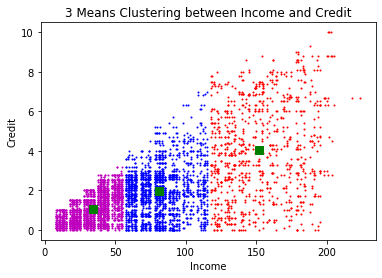

In [ ]:
# 4. Apply scipy.cluster.vq to perform 3-means clustering between Income and Credit.
# 4.1 Show three clusters in red, blue or magenta dots of size 1.
# 4.2 Show three centroids in green squares of size 8.
# 4.3 Label axes and figure title.


centroids,_ = kmeans(data,3) 
# assign each sample to a cluster 
index,_ = vq(data,centroids) 
# plot different color for each cluster by its index 
plt.plot(data['Income'][index==0],data['Credit'][index==0],'or',markersize=1) 
plt.plot(data['Income'][index==1],data['Credit'][index==1],'ob',markersize=1) 
plt.plot(data['Income'][index==2],data['Credit'][index==2],'om',markersize=1) 
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.xlabel("Income")
plt.ylabel("Credit")
plt.title("3 Means Clustering between Income and Credit") 
plt.show() 

Experience = 0.9946301306522234*Age + -24.99033871556276


Text(0.5, 1.0, 'Linear Regression ')

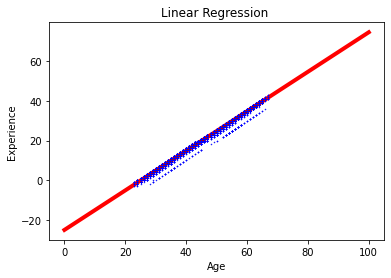

In [ ]:
# 5. Apply scipy.stats.linregress to perform linear regression on Experience given Age.
# 5.1 Print the estimation equation.
# 5.2 Show the data in blue dots of size 1.
# 5.3 Show the estimation equation in red line of width 4.
# 5.4 Label axes and figure title.

from scipy.stats import linregress 
import numpy as np
linSlope, linIntercept, linR, linP, linSE = linregress(df["Age"], df["Experience"]) 
print("Experience = {}*Age + {}".format(linSlope,linIntercept))
dem = np.linspace(0, 100, 5) 
plt.plot(dem, linIntercept + linSlope * dem, '-r', 
linewidth=4) 
plt.plot(df["Age"], df["Experience"], '.b',markersize=1) 
plt.xlabel("Age")
plt.ylabel("Experience")
plt.title("Linear Regression ")

Experience = 0.994630130652216*Age + -24.990338715619536


Text(0.5, 1.0, 'Curve Fitting')

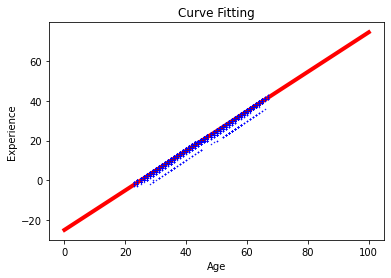

In [ ]:
# 6. Apply scipy.optimize.curve_fit to perform curve fitting on Experience given Age.
# 6.1 Print the estimation equation.
# 6.2 Show the data in blue dots of size 1.
# 6.3 Show the estimation equation in red line of width 4.
# 6.4 Label axes and figure title.
from scipy.optimize import curve_fit 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, df["Age"], df["Experience"]) 
print("Experience = {}*Age + {}".format(att[1],att[0]))
plt.plot(dem, att[0] + att[1] * dem, '-r', 
linewidth=4) 
plt.plot(df["Age"], df["Experience"], '.b',markersize=1) 
plt.xlabel("Age")
plt.ylabel("Experience")
plt.title("Curve Fitting")

Estimated intercept and coefficients:[-0.00481165],[[ 6.09972909e-02 -5.04360361e-02  9.54565666e-01  8.44709477e-01
  -1.45417696e-04  4.43044204e-02  6.62069573e-04  2.87244560e-01]]
Predictions : [0 0 0 ... 0 0 0]
Estimated Loan and probabilities:[[9.91957768e-01 8.04223154e-03]
 [9.97248467e-01 2.75153287e-03]
 [9.99931084e-01 6.89159741e-05]
 ...
 [9.97410203e-01 2.58979703e-03]
 [9.87777360e-01 1.22226402e-02]
 [9.89751257e-01 1.02487426e-02]]
Prediction Accuracy score:0.9366
Confusion Matrix:[[4429  226]
 [  91  254]]
False Positive rate:0.04854994629430719
True positive rate:0.736231884057971


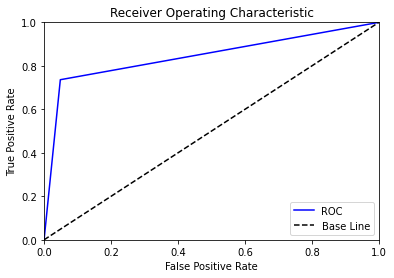

In [ ]:
# 7. Apply sklearn.linear_model.LogisticRegression to predict Loan using eight columns.
# 7.1 Print the estimated intercept and coefficients.
# 7.2 Estimate Loan prediction and probabilities on all eight columns.
# 7.3 Print the estimated Loan and probabilities.
# 7.4 Print the prediction accuracy score.
# 7.5 Print the confusion matrix.
# 7.6 Apply roc_curve function to create the true positive rate and false positive rate.
# 7.7 Create a square plot to report the Receiver Operating Characteristics (ROC) curve.
# 7.8 Show the ROC curve with a text label in blue color.
# 7.9 Show the baseline in broken line with a text label in black color.
# 7.10 Label axes and figure title.
import numpy as np
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.linear_model import LogisticRegression
res = LogisticRegression().fit(df.iloc[:, :8] ,df["Loan"])
print("Estimated intercept and coefficients:{},{}".format(res.intercept_, res.coef_))
print("Predictions : {}".format(res.predict(df.iloc[:, :8])))
print("Estimated Loan and probabilities:{}".format(res.predict_proba(df.iloc[:, :8])))
print("Prediction Accuracy score:{}".format(res.score(df.iloc[:,:8],df['Loan'])))
print("Confusion Matrix:{}".format(confusion_matrix(res.predict(df.iloc[:,:8]),df['Loan'])))

fpr,tpr,threshold = roc_curve(res.predict(df.iloc[:,:8]),df['Loan'])
print("False Positive rate:{}".format(fpr[1]))
print("True positive rate:{}".format(tpr[1]))
plt.axis([0,1,0,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC')
plt.plot([0, 1], [0, 1],'k--',label='Base Line')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()